<a href="https://colab.research.google.com/github/wantfree8937/Machine/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%EC%A0%9C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (실습) 실전 예제: 어레이 활용

In [1]:
import numpy as np

아래 코드는 인터넷 데이터 저장소로부터 아이리스(붓꽃) 데이터(`iris.data`)를 
2차원 넘파이 어레이로 불러온다.

- `np.genfromtxt()` 함수의 `dtype='str'` 키워드 옵션: 부동소수점과 문자열이 함께 포함된 데이터이기에 모두 문자열로 통일해서 불러오는 용도

In [2]:
import numpy as np

# 아이리스(붓꽃) 데이터 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='str')

`iris.data` 파일에는 아래 형식의 데이터가 150개 들어 있다. 

```python
5.1,3.5,1.4,0.2,Iris-setosa
```

하나의 데이터에 사용된 값들은 하나의 아이리스(붓꽃)에 대한 꽃잎, 꽃받침과 관련된 특성(features)과 품종을 나타내며,
보다 구체적으로 아래 순서를 따른다.

```
꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비, 품종
```

In [3]:
iris.shape

(150, 5)

길이와 너비를 저장하는 특성들은 원래 숫자이지만 위 코드는 문자열로 불러왔다.
처음 5개 데이터를 확인하면 다음과 같다.

__참고:__ `'<U15'`는 길이가 최대 15인 유니코드 문자열 자료형을 나타낸다.

In [4]:
iris[:5]

array([['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']], dtype='<U15')

수치형 데이터와 품종 데이터를 분리해서 각각 (150,4), (150,) 모양의 어레이를 생성하자.
이때 수치형 데이터는 `'f8'`, 즉 `'float64'` 자료형을 사용하도록 한다.

In [5]:
iris_features = iris[:,:4].astype('f8')
iris_labels = iris[:, 4]

In [6]:
iris_features[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

150개의 데이터는 아래 세 개의 품종으로 구분되며, 각각 50개씩 아래 언급된 순서대로 구분되어 있다.

```
'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
```

즉, 0번, 50번, 100번부터 각 품종의 데이터가 시작된다.

In [7]:
iris_labels[::50]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [8]:
iris_labels[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

In [9]:
iris_labels[50:55]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype='<U15')

In [10]:
iris_labels[100:105]

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype='<U15')

**문제 1**

꽃잎 길이(2번 열)가 1.5보다 크거나 꽃받침 길이(0번 열)가 5.0보다 작은 데이터만 추출하라.

In [11]:
# None을 적절한 부울 표현식으로 대체하라.

mask = (iris_features[:, 2] > 1.5) & (iris_features[:, 0] < 5.0)
iris_features[mask]

array([[4.8, 3.4, 1.6, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.9, 2.5, 4.5, 1.7]])

**문제 2**

꽃받침 길이(0번 열)와 꽃잎 길이(2번 열) 사이의 상관관계를 계산하라.

힌트: 넘파이의 적절한 함수를 활용한다. 상관계수에 대한 설명은 [위키백과: 상관분석](https://ko.wikipedia.org/wiki/상관_분석)을 참고한다.

In [12]:
# 적절한 넘파이 함수를 호출하라.

np.corrcoef(iris_features[:,0], iris_features[:,2])

array([[1.        , 0.87175416],
       [0.87175416, 1.        ]])

**문제 3**

아래 식으로 계산된 값을 갖는 새로운 열(column)이 추가된 2차원 어레이  `iris_features_added`를 생성하라.

$$\frac{\text{원주율} \times \text{꽃잎길이} \times \text{꽃받침길이}^2}{3} $$

힌트: `np.stack()` 함수를 활용할 수 있다.

In [13]:
# pass와 None을 각각 적절한 코드와 표현식으로 대체하라.
import math

added = (math.pi * iris_features[:, 2] * iris_features[:, 0] ** 2) / 3

iris_features_added = np.hstack((iris_features, added[:, np.newaxis]))

In [14]:
# 아래 주석을 해제하고 실행하라.

assert iris_features_added.shape == (150, 5)
iris_features_added[:5]

array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       , 38.13265163],
       [ 4.9       ,  3.        ,  1.4       ,  0.2       , 35.20049849],
       [ 4.7       ,  3.2       ,  1.3       ,  0.2       , 30.07237208],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       , 33.23805027],
       [ 5.        ,  3.6       ,  1.4       ,  0.2       , 36.65191429]])

**문제 4**

`Iris_versicolor` 품종에 해당하는 데이터만 `iris_features`로부터 추출하라. 

In [15]:
# None을 적절한 부울 표현식으로 대체하라.

mask = (iris_labels == 'Iris-versicolor')
iris_features[mask][:5]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

**문제 5**

꽃받침 길이(0번 열)의 평균값(mean), 중앙값(median), 표준편차(standard deviation)를 구하라.

In [185]:
# None을 적절한 표현식으로 대체하라.

petal_sepal_mean = np.mean(iris_features[:,0])
petal_sepal_median = np.median(iris_features[:,0])
petal_sepal_std = np.std(iris_features[:,0])

print(petal_sepal_mean, petal_sepal_median, petal_sepal_std)

5.843333333333334 5.8 0.8253012917851409


**문제 6**

세 개의 품종 별 꽃받침 너비(1번 열)의 평균값을 계산하여 아래 어레이와 동일한 모양을 갖는 
어레이 `iris_kind_sepal_length`를 생성하라.

```
[['Iris-setosa', 3.418],
 ['Iris-versicolor', 2.770],
 ['Iris-virginica', 2.974]]
```

In [17]:
# pass와 None을 각각 적절한 코드와 표현식으로 대체하라.

def iris_mean(name):
  return np.mean(iris_features[iris_labels == name][:,1])

iris_array = []

for item in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
  iris_array.append([item, iris_mean(item)])

iris_kind_sepal_length = iris_array

iris_kind_sepal_length

[['Iris-setosa', 3.418],
 ['Iris-versicolor', 2.7700000000000005],
 ['Iris-virginica', 2.974]]

**문제 7**

꽃잎 너비(3번 열)에 사용된 값을 모두 0과 1사이의 값으로 변환하라. 

힌트: 꽃잎 너비 등 하나의 특성에 속하는 값을 모두 0과 1사이의 값으로 변환하는 작업을 정규화(normalization)라 한다.
정규화에 대한 설명은 [정규화/표준화](https://rucrazia.tistory.com/90)를 참고하라.

In [18]:
# None을 적절한 부울 표현식으로 대체하라.

iris_features_normalized = (iris_features[:,3] - min(iris_features[:,3])) / (max(iris_features[:,3]) - min(iris_features[:,3]))

In [19]:
# 아래 주석을 해제하고 실행하라.

iris_features_normalized[:5]

array([0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667])

**문제 8**

`iris_features`에 사용된 모든 값을 특성 별로 표준화(standardization)하라. 

힌트: 표준화에 대한 설명은 [정규화/표준화](https://rucrazia.tistory.com/90)를 참고하라.

In [20]:
# None을 적절한 부울 표현식으로 대체하라.

iris_features_standardized = (iris_features - np.mean(iris_features, axis=0)) / np.std(iris_features, axis=0)

In [29]:
# 아래 주석을 해제하고 실행하라.

iris_features_standardized[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

**문제 9**

붓꽃 데이터셋의 품종 분류를 아래 그림과 같은 형식으로 그리는 코드를 작성하라.

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/iris-classification.png" style="width:600px;"></div>

In [74]:
X = iris_features_standardized[:, 2] # 꽃잎 길이
Y = iris_features_standardized[:, 3] # 꽃잎 너비

(-1.8, 2.0, -1.5, 2.0)

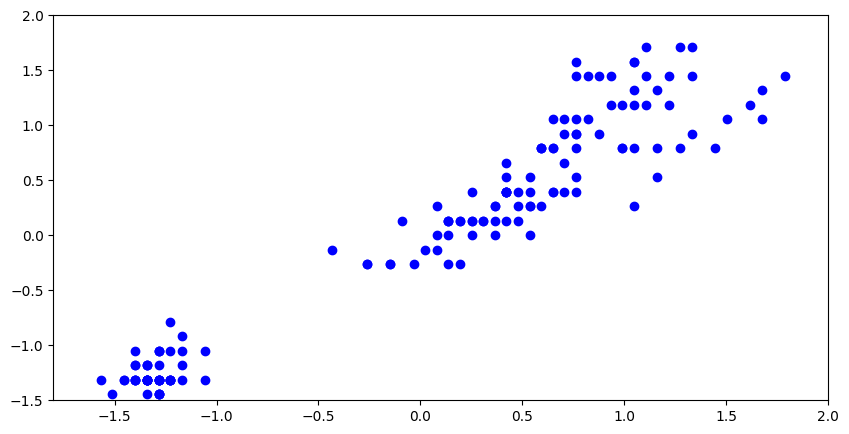

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(X, Y, 'bo')
# plt.plot(X, Y, color='blue', marker='o', linestyle='')

plt.axis([-1.8, 2, -1.5, 2])

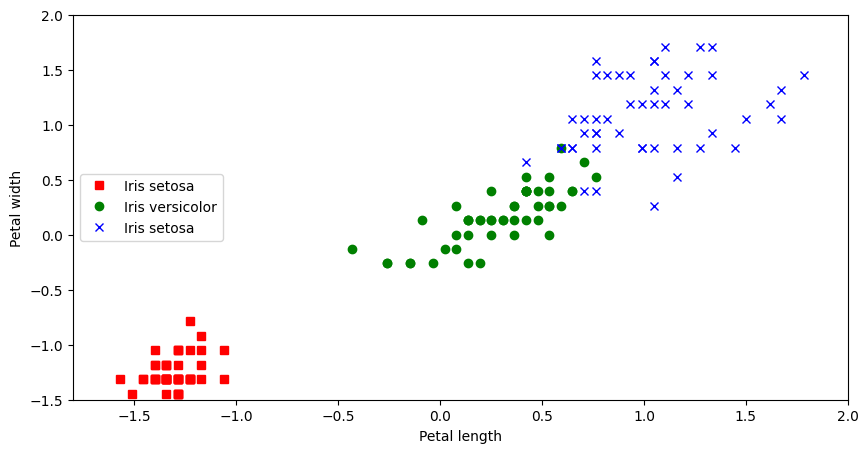

In [175]:
plt.figure(figsize=(10, 5))

# 세토사 품종 산점도: 빨강 네모
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'rs', label='Iris setosa')
# 버시컬러 품종 산점도: 초록 동그라미
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'go', label='Iris versicolor')
# 버지니카 품종 산점도: 파랑 x
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'bx',  label='Iris setosa')

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")

plt.axis([-1.8, 2, -1.5, 2])
plt.show()

In [179]:
points_x = np.arange(-1.8, 2.1, 0.02)
points_y = np.arange(-1.5, 2.1, 0.02)
xs, ys = np.meshgrid(points_x, points_y)

In [180]:
Z = np.zeros(xs.shape)
Z[(-1.0 <= xs + ys) & (xs + ys < 1.5)] = 1
Z[(1.4 <= xs + 1.2*ys)] = 2

In [206]:
# 각 종류의 평균값 지정
setosa_length_mean = np.mean(iris_features_standardized[iris_labels == 'Iris-setosa'][:,2])
setosa_width_mean  = np.mean(iris_features_standardized[iris_labels == 'Iris-setosa'][:,3])
versicolor_length_mean = np.mean(iris_features_standardized[iris_labels == 'Iris-versicolor'][:,2])
versicolor_width_mean  = np.mean(iris_features_standardized[iris_labels == 'Iris-versicolor'][:,3])
virginica_length_mean = np.mean(iris_features_standardized[iris_labels == 'Iris-virginica'][:,2])
virginica_width_mean  = np.mean(iris_features_standardized[iris_labels == 'Iris-virginica'][:,3])

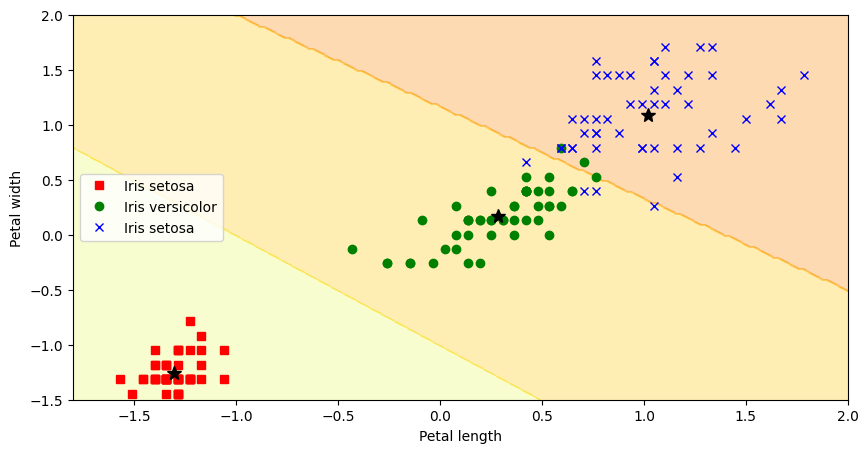

In [207]:
plt.figure(figsize=(10, 5))

# 등고선을 색으로 구분
plt.contourf(xs, ys, Z, alpha=0.3, cmap='Wistia')

# 붓꽃 데이터 산점도
plt.plot(X[iris_labels == 'Iris-setosa'], Y[iris_labels == 'Iris-setosa'], 'rs', label='Iris setosa')
plt.plot(X[iris_labels == 'Iris-versicolor'], Y[iris_labels == 'Iris-versicolor'], 'go', label='Iris versicolor')
plt.plot(X[iris_labels == 'Iris-virginica'], Y[iris_labels == 'Iris-virginica'], 'bx',  label='Iris setosa')

# 각 종류의 평균값 별 표시
plt.plot(setosa_length_mean, setosa_width_mean, 'k*', markersize=10)
plt.plot(versicolor_length_mean, versicolor_width_mean, 'k*', markersize=10)
plt.plot(virginica_length_mean, virginica_width_mean, 'k*', markersize=10)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([-1.8, 2, -1.5, 2])

# plt.grid()
plt.show()